In [78]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


In [79]:
df = pd.read_csv('mall customers.csv')
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [80]:
df.shape

(200, 5)

In [81]:
df.rename(columns = {'Annual Income (k$)':'income','Spending Score (1-100)':'score'}, inplace =True)

df

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


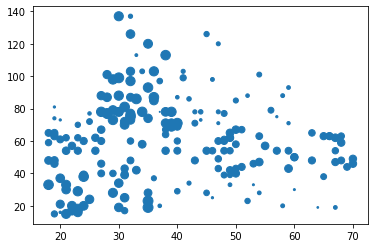

In [82]:
plt.scatter(df['Age'],df['income'],df['score'])

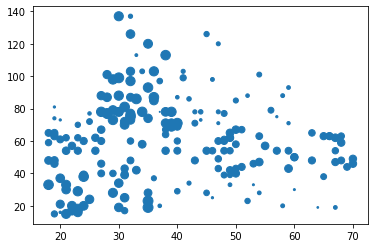

In [83]:
plt.scatter(df['Age'],df['income'],df[ 'score'])

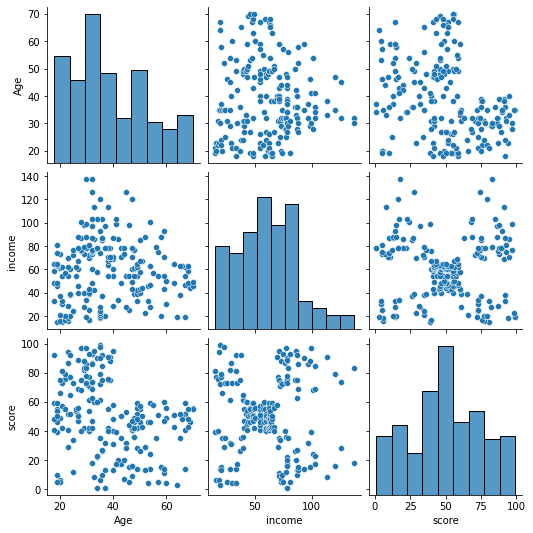

In [84]:
import seaborn as sns

sns.pairplot(df[['Age','income','score']])


In [85]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'income', 'score'], dtype='object')

In [86]:
df =  df.drop(['CustomerID','Gender'], axis =1)

In [87]:
df

,Age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [88]:
import sklearn.cluster as cluster

In [89]:
kmeans = cluster.KMeans(random_state=42)

kmeans.fit(df[['Age' , 'income' , 'score']])

KMeans(random_state=42)

In [90]:
kmeans.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 5,
       4, 3, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 5, 5, 1, 1, 5, 1, 1, 5, 1, 1, 5,
       5, 1, 1, 5, 1, 5, 5, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 5, 5, 5, 5, 1, 1, 1, 1, 5, 5, 5, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7])

In [91]:
df['clusters'] = kmeans.predict(df[['Age' ,'income','score']])

In [92]:
kmeans.predict([[19,15,39]])

array([4])

In [93]:
centers = kmeans.cluster_centers_

centers


array([[ 41.96      ,  79.64      ,  15.4       ],
       [ 56.34090909,  53.70454545,  49.38636364],
       [ 32.86206897,  78.55172414,  82.17241379],
       [ 25.27272727,  25.72727273,  79.36363636],
       [ 44.31818182,  25.77272727,  20.27272727],
       [ 27.        ,  56.65789474,  49.13157895],
       [ 41.        , 109.7       ,  22.        ],
       [ 32.2       , 109.7       ,  82.        ]])

In [94]:
df

,Age,income,score,clusters
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,7
196,45,126,28,6
197,32,126,74,7
198,32,137,18,6


# VIS


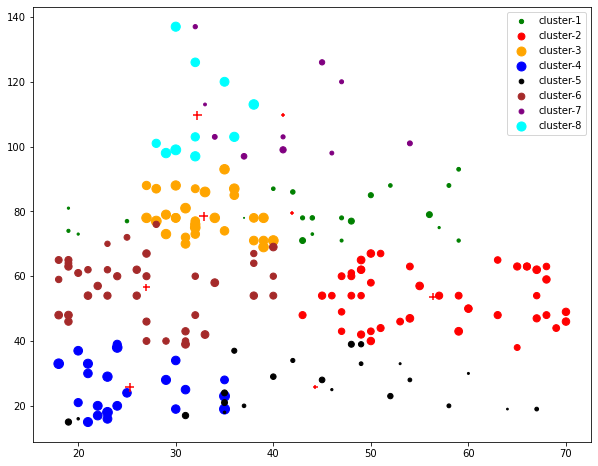

In [95]:

df1 = df[df.clusters== 0]
df2 = df[df.clusters== 1]
df3 = df[df.clusters== 2]
df4 = df[df.clusters== 3]
df5 = df[df.clusters== 4]
df6 = df[df.clusters== 5]
df7 = df[df.clusters== 6]
df8 = df[df.clusters== 7]

plt.figure(figsize=(10,8))

plt.scatter(df1['Age'],df1['income'],df1['score'],color='green',label='cluster-1')
plt.scatter(df2['Age'],df2['income'],df2['score'],color='red',label='cluster-2')
plt.scatter(df3['Age'],df3['income'],df3['score'],color='orange',label='cluster-3')
plt.scatter(df4['Age'],df4['income'],df4['score'],color='blue',label='cluster-4')
plt.scatter(df5['Age'],df5['income'],df5['score'],color='black',label='cluster-5')
plt.scatter(df6['Age'],df6['income'],df6['score'],color='brown',label='cluster-6')
plt.scatter(df7['Age'],df7['income'],df7['score'],color='purple',label='cluster-7')
plt.scatter(df8['Age'],df8['income'],df8['score'],color='cyan',label='cluster-8')

plt.scatter(centers[:,0], centers[:,1], centers[:,2],color='red', marker='+')


plt.legend()


# Optimizing Cluster

In [96]:
wess = []

clusters = range(1,20)
for i in clusters:
    km = cluster.KMeans(n_clusters=i,random_state=42)
    km.fit(df[['Age' ,'income','score']])
    wess.append(km.inertia_)
    


E:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [97]:
wess

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75378.76464074482,
 58302.40630860365,
 51118.949931647316,
 44312.468812077226,
 40894.989782139775,
 37468.51571576572,
 34174.55217264217,
 32433.69344303443,
 29426.047295297292,
 28300.520737486917,
 26398.282683982685,
 24806.644619269624,
 22926.80967463907,
 22084.58933566434,
 21693.935851506605]

Text(0, 0.5, 'Sum of squared error')

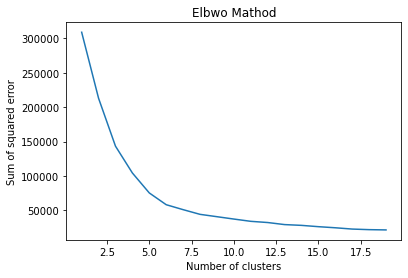

In [98]:
plt.plot(clusters,wess)
plt.title('Elbwo Mathod')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')

In [99]:
!pip install kneed

In [100]:
from kneed import KneeLocator

In [101]:
kneedle = KneeLocator(clusters,wess,curve = 'convex',direction = 'decreasing') 

In [102]:
kneedle

In [103]:
optimal_clusters = kneedle.knee

In [104]:
optimal_clusters

6

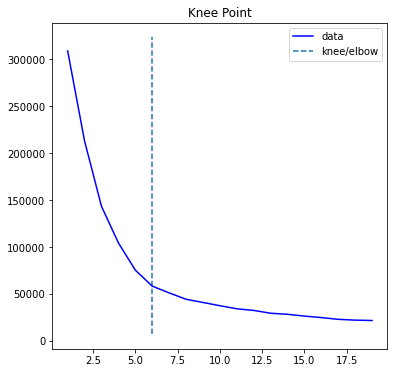

In [105]:
kneedle.plot_knee()

# After tuning

In [106]:
kmeans = cluster.KMeans(n_clusters=6,  random_state=42 )
kmeans.fit(df[['Age','income','score']])

KMeans(n_clusters=6, random_state=42)

In [107]:
kmeans.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [108]:
kmeans.predict(df[['Age','income','score']])

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1])

In [109]:
df['otimal_clusters'] = kmeans.predict(df[['Age','income','score']])

In [110]:
df

,Age,income,score,clusters,otimal_clusters
0,19,15,39,4,0
1,21,15,81,3,3
2,20,16,6,4,0
3,23,16,77,3,3
4,31,17,40,4,0
...,...,...,...,...,...
195,35,120,79,7,1
196,45,126,28,6,5
197,32,126,74,7,1
198,32,137,18,6,5


In [111]:

df =  df.drop(['clusters'], axis =1)

In [112]:
df

,Age,income,score,otimal_clusters
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [113]:
kmeans.predict([[40,90,50]])

array([5])

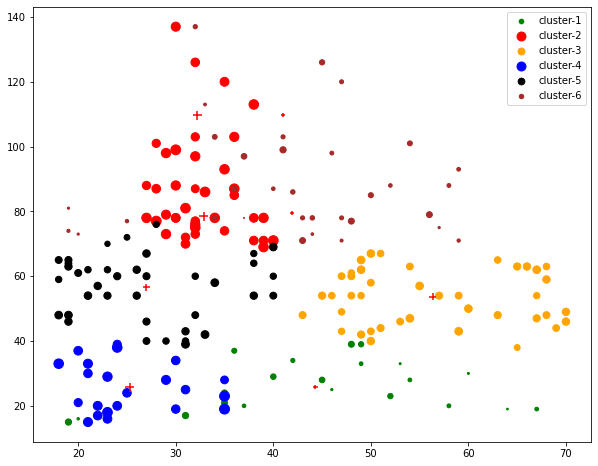

In [117]:
# df1 = df[df.otimal_clusters]
# df2 = df[df.otimal_clusters]
# df3 = df[df.otimal_clusters]
# df4 = df[df.otimal_clusters]
# df5 = df[df.otimal_clusters]
# df6 = df[df.otimal_clusters]


plt.figure(figsize=(10,8))

plt.scatter(df1['Age'],df1['income'],df1['score'],color='green',label='cluster-1')
plt.scatter(df2['Age'],df2['income'],df2['score'],color='red',label='cluster-2')
plt.scatter(df3['Age'],df3['income'],df3['score'],color='orange',label='cluster-3')
plt.scatter(df4['Age'],df4['income'],df4['score'],color='blue',label='cluster-4')
plt.scatter(df5['Age'],df5['income'],df5['score'],color='black',label='cluster-5')
plt.scatter(df6['Age'],df6['income'],df6['score'],color='brown',label='cluster-6')



plt.scatter(centers[:,0], centers[:,1], centers[:,2],color='red', marker='+')


plt.legend()